27
At iteration 0
At iteration 1
At iteration 2
At iteration 3
At iteration 4
At iteration 5
At iteration 6
At iteration 7
At iteration 8
At iteration 9
At iteration 10
At iteration 11
At iteration 12
At iteration 13
At iteration 14
At iteration 15
At iteration 16
At iteration 17
At iteration 18
At iteration 19
At iteration 20
At iteration 21
At iteration 22
At iteration 23
At iteration 24
At iteration 25
At iteration 26
At iteration 27
At iteration 28
At iteration 29
At iteration 30
At iteration 31
At iteration 32
At iteration 33
At iteration 34
At iteration 35
At iteration 36
At iteration 37
At iteration 38
At iteration 39
At iteration 40
At iteration 41
At iteration 42
At iteration 43
At iteration 44
At iteration 45
At iteration 46
At iteration 47
At iteration 48
At iteration 49
At iteration 50
At iteration 51
At iteration 52
At iteration 53
At iteration 54
At iteration 55
At iteration 56
At iteration 57
At iteration 58
At iteration 59
At iteration 60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Streaming output truncated to the last 5000 lines.
At iteration 200
At iteration 201
At iteration 202
At iteration 203
At iteration 204
At iteration 205
At iteration 206
At iteration 207
At iteration 208
At iteration 209
At iteration 210
At iteration 211
At iteration 212
At iteration 213
At iteration 214
At iteration 215
At iteration 216
At iteration 217
At iteration 218
At iteration 219
At iteration 220
At iteration 221
At iteration 222
At iteration 223
At iteration 224
At iteration 225
At iteration 226
At iteration 227
At iteration 228
At iteration 229
At iteration 230
At iteration 231
At iteration 232
At iteration 233
At iteration 234
At iteration 235
At iteration 236
At iteration 237
At iteration 238
At iteration 239
At iteration 240
At iteration 241
At iteration 242
At iteration 243
At iteration 244
At iteration 245
At iteration 246
At iteration 247
At iteration 248
At iteration 249
At iteration 250
At iteration 251
At iteration 252
At iteration 253
At iteration 254
At iteration 2

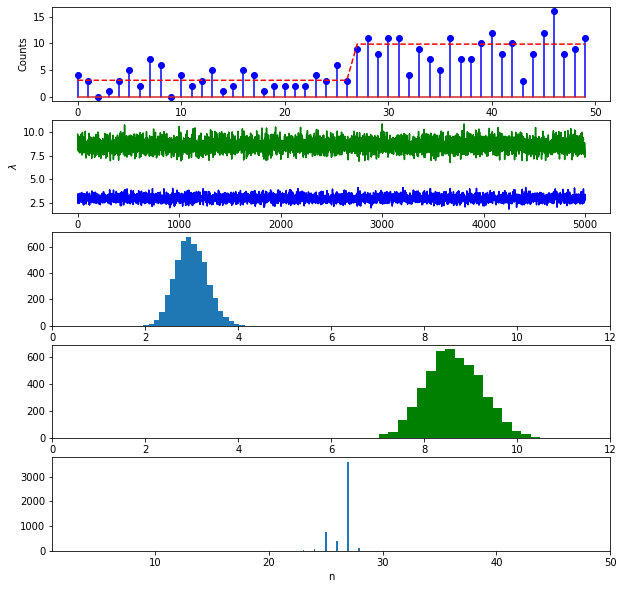

In [ ]:
no# Gibbs sampler for the change-point model described in a Cognition cheat sheet titled "Gibbs sampling."
# This is a Python implementation of the procedure at http://www.cmpe.boun.edu.tr/courses/cmpe58n/fall2009/
# Written by Ilker Yildirim, September 2012.

from scipy.stats import uniform, gamma, poisson
import matplotlib.pyplot as plt
import numpy
from numpy import log,exp
from numpy.random import multinomial

# fix the random seed for replicability.
numpy.random.seed(123456789)

# Generate data

# Hyperparameters
N=50
a=2
b=1

# Change-point: where the intensity parameter changes.
n=int(round(uniform.rvs()*N))
print(str(n))

# Intensity values
lambda1=gamma.rvs(a,scale=1./b) # We use 1/b instead of b because of the way Gamma distribution is parametrized in the package random.
lambda2=gamma.rvs(a,scale=1./b)

lambdas=[lambda1]*n
lambdas[n:N-1]=[lambda2]*(N-n)

# Observations, x_1 ... x_N
x=poisson.rvs(lambdas)

# make one big subplots and put everything in it.
f, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1, figsize=(10,10))
#f = figsize(10,10)
# Plot the data
ax1.stem(range(N),x,linefmt='b-', markerfmt='bo')
ax1.plot(range(N),lambdas,'r--')
ax1.set_ylabel('Counts')

# Gibbs sampler
E=5200
BURN_IN=200

# Initialize the chain
n=int(round(uniform.rvs()*N))
lambda1=gamma.rvs(a,scale=1./b)
lambda2=gamma.rvs(a,scale=1./b)

# Store the samples
chain_n=numpy.array([0.]*(E-BURN_IN))
chain_lambda1=numpy.array([0.]*(E-BURN_IN))
chain_lambda2=numpy.array([0.]*(E-BURN_IN))

for e in range(E):
	print("At iteration "+str(e))
	# sample lambda1 and lambda2 from their posterior conditionals, Equation 8 and Equation 9, respectively.
	lambda1=gamma.rvs(a+sum(x[0:n]), scale=1./(n+b))
	lambda2=gamma.rvs(a+sum(x[n:N]), scale=1./(N-n+b))
	
	# sample n, Equation 10
	mult_n=numpy.array([0]*N)
	for i in range(N):
		mult_n[i]=sum(x[0:i])*log(lambda1)-i*lambda1+sum(x[i:N])*log(lambda2)-(N-i)*lambda2
	mult_n=exp(mult_n-max(mult_n))
	n=numpy.where(multinomial(1,mult_n/sum(mult_n),size=1)==1)[1][0]
	
	# store
	if e>=BURN_IN:
		chain_n[e-BURN_IN]=n
		chain_lambda1[e-BURN_IN]=lambda1
		chain_lambda2[e-BURN_IN]=lambda2
		

ax2.plot(chain_lambda1,'b',chain_lambda2,'g')
ax2.set_ylabel('$\lambda$')
ax3.hist(chain_lambda1,20)
ax3.set_xlabel('$\lambda_1$')
ax3.set_xlim([0,12])
ax4.hist(chain_lambda2,20,color='g')
ax4.set_xlim([0,12])
ax4.set_xlabel('$\lambda_2$')
ax5.hist(chain_n,50)
ax5.set_xlabel('n')
ax5.set_xlim([1,50])
plt.show()
